# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd


df = pd.read_csv('data/human_body_temperature.csv')

print(df.head(10))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0


In [66]:
print(np.std(df.temperature))
print(np.mean(df.temperature))

0.730357778905038
98.24923076923075


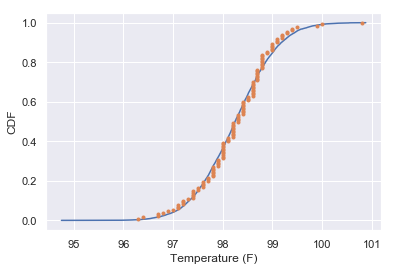

In [3]:
# 1. Is the distribution of body temperatures normal?

#import required modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set seaborn settings
sns.set()

mean_body_temperature = np.mean(df.temperature)  #calculate body temperature mean
std_body_temperature = np.std(df.temperature)   # calculate body temperature standard deviation
samples_body_temperature = np.random.normal(mean_body_temperature, std_body_temperature, size = 10000) # create a sample nomral distribution with 10000 data points as reference

#define a function to calculate the ECDF (Empirical cumulative distribution functions)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#apply ecdf function to the original data set to get pairs of x and y value, x = temperature, y = CDF
x, y = ecdf(df.temperature)
#apply ecdf function to the created normal distribution data set
x_theor, y_theor = ecdf(samples_body_temperature)

# plot theortical ECDF graph
_ = plt.plot(x_theor, y_theor)
# plot ECDF graph from observed data
_ = plt.plot(x, y, marker='.', linestyle='none')
# label x axis
_ = plt.xlabel('Temperature (F)')
# label y axis
_ = plt.ylabel('CDF')

#show the plot
plt.show()



Q1:Is the distribution of body temperatures normal?
A1:From the plot of Temperature vs CDF,  the temperature distribution looks like normal distribution as the data follow the normal distribution curve fairly well. 

Q2: Is the sample size large? Are the observations independent?
A2: According to the Central Limit Theorem, CLT will hold generally when the sample size is great than 30. We have 130 samples, that should be large enough to apply CLT. The observations should be independent from each other.  As the temperature of one person provide no information about the occurence of the other people's temperature. 

In [23]:
# 3 Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test.
# Assign the popluation mean that we want to verify into a variable
temperature_true_mean = 98.6
# define a function that generate bootstrap samples
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
# define a function that generate bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# calculate the bootstrap replicates for this dataset
bs_replicates_temperature = draw_bs_reps(df.temperature, np.mean, 10000)
# calculate the p-value
p_value = format(np.sum(bs_replicates_temperature >= temperature_true_mean) / len(bs_replicates_temperature), '.5f')
print ('p value is: ', p_value)

p value is:  0.00000


A: The Null Hypothesis is : the true mean temperature in human body is 98.6. After doing the bootstrap hypothesis test, we got a p value = 0 which indicated that there is a strong evident against the null hypothesis, we can reject the Null Hypothesis. 

Q: Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
A: One sample test should be used because we are comparing our data mean to a known value (98.6 f)


In [24]:
# Calculates p value using 100,000 boostrap replicates
bootstrap_replicates = np.empty(100000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p =', p)



p = 0.0


In [26]:
# In this situation, is it appropriate to use the  t  or  z  statistic?
# import required modules
from scipy import stats

#perform one-sample t test
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The Null Hypothesis is that mean of the temperature of dataset equals to 98.6. The alternative hypothesis is that mean of the temperature of the dataset does not equal to 98.6. p-value of the one-sample is way less than 0.05. We will reject the Null hypothesis. 

In [27]:
!pip install -U statsmodels

In [30]:
# import statsmodels
from statsmodels.stats import weightstats as stests
testResult=stests.ztest(df.temperature,value=98.6)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")


p-value is: 4.9021570141012155e-08



Since our sample size is 130 which is greater than 30, a z-test is more appropriate. The p-value of z-test is smaller than the p-value of t test. It provided the same conclusion as the t-test that we will reject the Null hypothesis. The p-value is different because they are two different distribution. t-test could be used for smaller sample size dataset. 

In [33]:
# 4.Draw a small sample of size 10 from the data and repeat both frequentist tests.
# Draw a small sample of size 10
smaller_sample = np.random.choice(df.temperature, size=10)

#perform one-sample t test
TTestResult = stats.ttest_1samp(smaller_sample, 98.6)
pValue_T=TTestResult[1]
print("p-value for t-test is: "+str(pValue_T))

#perform one-sample z test
testResult=stests.ztest(smaller_sample,value=98.6)
pValue_Z=testResult[1]
print("p-value for z-test is: "+str(pValue_Z))


p-value for t-test is: 0.840826191532229
p-value for z-test is: 0.8362249774202806


Q: Which one is the correct one to use?
A: Since we have a smaller sample size = 10, we should use t-test
Q: What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
A: For smaller size sample (<30), the p-value for both t-test and z-test are very close. there is not significant difference between the test results. Both test can be applied to smaller sample size dataset. For larger size sample (>30), we should use z-test.


In [63]:
#5 At what temperature should we consider someone's temperature to be "abnormal"?
# bootstrap approach

# Calculates p value using 100,000 boostrap replicates
bootstrap_replicates = np.empty(100000)

# size of the bootstrap samples
size = len(bootstrap_replicates)
# calculate the mean of bootstrap samples
for i in range(size):
    bootstrap_sample = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)
# calculate the 95% confidence interval for boostrap samples    
conf_int = np.percentile(bootstrap_replicates, [5,95])
print('The 90% confidence interval is: ', conf_int)


The 90% confidence interval is:  [98.14461538 98.35538462]


In [49]:
# Frequentist approach
frequentist_confi_interval = stats.t.interval(0.90, len(df.temperature)-1, loc=np.mean(df.temperature), scale=stats.sem(df.temperature))
print('The 90% confidence interval (frequentist) is : ', frequentist_confi_interval)

The 90% confidence interval (frequentist) is :  (98.14269432413487, 98.35576721432663)


Q: At what temperature should we consider someone's temperature to be "abnormal"?
A: We will consider someone's temperature outside the 90% confidence interval to be abnormal. In this case is 

In [61]:
# 6 Is there a significant difference between males and females in normal temperature?
# prepare data: separate out female and male

female_temp = df[df['gender'] == 'F']
male_temp = df[df['gender']=='M']
female_count = np.count_nonzero(female_temp.temperature)
print('Female count: ', female_count)
male_count = np.count_nonzero(male_temp.temperature)
print('Male count:', male_count)

#perform two sample t test 
TTestResult1 = stats.ttest_ind(female_temp.temperature, male_temp.temperature)
pValue_T1=TTestResult1[1]
print("p-value for t-test is: "+str(pValue_T1))

#perform two-sample z test
testResult1=stests.ztest(female_temp.temperature,male_temp.temperature,alternative='two-sided')
pValue_Z1=testResult1[1]
print("p-value for z-test is: "+str(pValue_Z1))

Female count:  65
Male count: 65
p-value for t-test is: 0.02393188312239561
p-value for z-test is: 0.02228736076065755


Q: What testing approach did you use and why?
A: Since each data set has 65 samples, we have more than 30 samples. The best approach will be using two sample z-test. 
Q: Write a story with your conclusion in the context of the original problem.
A: Our Null Hypothesis is: there is no significant difference between male and female body temperature. Our Alternative Hypothesis is: there is significant difference between male and female body temperature. As our p-value for z-test is <0.05, we will reject the Null Hypothesis and accept the alternative hypothesis. Our data supported the conclusion that there is noticable difference between female and male body temperature. 